In [1]:
%run Pre-Processing.ipynb

In [20]:
%run Models.ipynb

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from imblearn.over_sampling import ADASYN
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier

In [22]:
SVM_f1 = dict()
KNN_f1 = dict()
RFC_f1 = dict()
LGBM_f1 = dict()
XGB_f1 = dict()
CB_f1 = dict()

In [25]:
for x in range(71, 10, -10):
    num_feature = x
    print("No of feature", num_feature)
    selector = SelectKBest(score_func=f_classif, k=num_feature)
    X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
    X_test_selected = selector.transform(X_test_transformed)
    SVM_f1[x] = SVM_selector(X_train_selected, y_train_resampled, X_test_selected, y_test)
    KNN_f1[x] = KNN_Classifier(X_train_selected, y_train_resampled, X_test_selected, y_test)
    RFC_f1[x] = RandomForest_Classifier(X_train_selected, y_train_resampled, X_test_selected, y_test)
    LGBM_f1[x] = LGBM_Classifier(X_train_selected, y_train_resampled, X_test_selected, y_test)
    XGB_f1[x] = XGB_Classifier(X_train_selected, y_train_resampled, X_test_selected, y_test)
    CB_f1[x] = CatBoost_Classifier(X_train_selected, y_train_resampled, X_test_selected, y_test)

No of feature 71
SVM Model:-
[LibSVM]

C:\Users\gauta\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Making predictions...

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9368    0.9824    0.9591    103560
      Attack     0.2570    0.0840    0.1267      7496

    accuracy                         0.9218    111056
   macro avg     0.5969    0.5332    0.5429    111056
weighted avg     0.8909    0.9218    0.9029    111056


Confusion Matrix:
[[101739   1821]
 [  6866    630]]
KNN model
Classification Report:
              precision    recall  f1-score   support

      Normal     0.9392    0.9028    0.9206    103560
      Attack     0.1254    0.1926    0.1519      7496

    accuracy                         0.8548    111056
   macro avg     0.5323    0.5477    0.5363    111056
weighted avg     0.8843    0.8548    0.8687    111056

Confusion Matrix:
[[93491 10069]
 [ 6052  1444]]
Random Forest:-


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.4min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.6s finished


Classification Report:
              precision    recall  f1-score   support

      Normal     0.9976    0.8604    0.9239    103560
      Attack     0.3350    0.9715    0.4982      7496

    accuracy                         0.8679    111056
   macro avg     0.6663    0.9159    0.7110    111056
weighted avg     0.9529    0.8679    0.8952    111056

Confusion Matrix:
[[89102 14458]
 [  214  7282]]
LGBM Model:-
[LightGBM] [Info] Number of positive: 83069, number of negative: 414022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.118068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16478
[LightGBM] [Info] Number of data points in the train set: 497091, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167110 -> initscore=-1.606248
[LightGBM] [Info] Start training from score -1.606248
Classification Report:
              precision    recall  f1-score   support

      Normal 

C:\Users\gauta\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Making predictions...

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9357    0.9656    0.9504    103560
      Attack     0.1501    0.0840    0.1078      7496

    accuracy                         0.9061    111056
   macro avg     0.5429    0.5248    0.5291    111056
weighted avg     0.8827    0.9061    0.8935    111056


Confusion Matrix:
[[99994  3566]
 [ 6866   630]]
KNN model
Classification Report:
              precision    recall  f1-score   support

      Normal     0.9391    0.9032    0.9208    103560
      Attack     0.1247    0.1906    0.1508      7496

    accuracy                         0.8551    111056
   macro avg     0.5319    0.5469    0.5358    111056
weighted avg     0.8841    0.8551    0.8688    111056

Confusion Matrix:
[[93531 10029]
 [ 6067  1429]]
Random Forest:-


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.3min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.6s finished


Classification Report:
              precision    recall  f1-score   support

      Normal     0.9976    0.8599    0.9237    103560
      Attack     0.3343    0.9720    0.4975      7496

    accuracy                         0.8675    111056
   macro avg     0.6660    0.9159    0.7106    111056
weighted avg     0.9529    0.8675    0.8949    111056

Confusion Matrix:
[[89051 14509]
 [  210  7286]]
LGBM Model:-
[LightGBM] [Info] Number of positive: 83069, number of negative: 414022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.098921 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13949
[LightGBM] [Info] Number of data points in the train set: 497091, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167110 -> initscore=-1.606248
[LightGBM] [Info] Start training from score -1.606248
Classification Report:
              precision    recall  f1-score   support

      Normal 

C:\Users\gauta\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Making predictions...

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9367    0.9812    0.9584    103560
      Attack     0.2443    0.0840    0.1251      7496

    accuracy                         0.9206    111056
   macro avg     0.5905    0.5326    0.5417    111056
weighted avg     0.8900    0.9206    0.9022    111056


Confusion Matrix:
[[101611   1949]
 [  6866    630]]
KNN model
Classification Report:
              precision    recall  f1-score   support

      Normal     0.9389    0.9042    0.9212    103560
      Attack     0.1241    0.1876    0.1494      7496

    accuracy                         0.8558    111056
   macro avg     0.5315    0.5459    0.5353    111056
weighted avg     0.8839    0.8558    0.8691    111056

Confusion Matrix:
[[93634  9926]
 [ 6090  1406]]
Random Forest:-


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.6s finished


Classification Report:
              precision    recall  f1-score   support

      Normal     0.9972    0.8614    0.9243    103560
      Attack     0.3353    0.9661    0.4978      7496

    accuracy                         0.8684    111056
   macro avg     0.6662    0.9137    0.7110    111056
weighted avg     0.9525    0.8684    0.8955    111056

Confusion Matrix:
[[89202 14358]
 [  254  7242]]
LGBM Model:-
[LightGBM] [Info] Number of positive: 83069, number of negative: 414022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11660
[LightGBM] [Info] Number of data points in the train set: 497091, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167110 -> initscore=-1.606248
[LightGBM] [Info] Start training from score -1.606248
Classification Report:
              precision    recall  f1-score   support

      Normal 

C:\Users\gauta\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Making predictions...

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9357    0.9645    0.9499    103560
      Attack     0.1463    0.0840    0.1068      7496

    accuracy                         0.9051    111056
   macro avg     0.5410    0.5243    0.5283    111056
weighted avg     0.8824    0.9051    0.8930    111056


Confusion Matrix:
[[99884  3676]
 [ 6866   630]]
KNN model
Classification Report:
              precision    recall  f1-score   support

      Normal     0.9388    0.9039    0.9210    103560
      Attack     0.1228    0.1858    0.1479      7496

    accuracy                         0.8554    111056
   macro avg     0.5308    0.5449    0.5344    111056
weighted avg     0.8837    0.8554    0.8688    111056

Confusion Matrix:
[[93609  9951]
 [ 6103  1393]]
Random Forest:-


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.5s finished


Classification Report:
              precision    recall  f1-score   support

      Normal     0.9972    0.8611    0.9242    103560
      Attack     0.3351    0.9672    0.4978      7496

    accuracy                         0.8683    111056
   macro avg     0.6662    0.9141    0.7110    111056
weighted avg     0.9526    0.8683    0.8954    111056

Confusion Matrix:
[[89175 14385]
 [  246  7250]]
LGBM Model:-
[LightGBM] [Info] Number of positive: 83069, number of negative: 414022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059878 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9559
[LightGBM] [Info] Number of data points in the train set: 497091, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167110 -> initscore=-1.606248
[LightGBM] [Info] Start training from score -1.606248
Classification Report:
              precision    recall  f1-score   support

      Normal  

C:\Users\gauta\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Making predictions...

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9351    0.9527    0.9438    103560
      Attack     0.1172    0.0868    0.0998      7496

    accuracy                         0.8942    111056
   macro avg     0.5262    0.5198    0.5218    111056
weighted avg     0.8799    0.8942    0.8868    111056


Confusion Matrix:
[[98658  4902]
 [ 6845   651]]
KNN model
Classification Report:
              precision    recall  f1-score   support

      Normal     0.9387    0.9049    0.9215    103560
      Attack     0.1229    0.1841    0.1474      7496

    accuracy                         0.8563    111056
   macro avg     0.5308    0.5445    0.5345    111056
weighted avg     0.8837    0.8563    0.8693    111056

Confusion Matrix:
[[93715  9845]
 [ 6116  1380]]
Random Forest:-


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   52.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.5s finished


Classification Report:
              precision    recall  f1-score   support

      Normal     0.9983    0.8591    0.9235    103560
      Attack     0.3348    0.9800    0.4991      7496

    accuracy                         0.8672    111056
   macro avg     0.6666    0.9195    0.7113    111056
weighted avg     0.9535    0.8672    0.8948    111056

Confusion Matrix:
[[88964 14596]
 [  150  7346]]
LGBM Model:-
[LightGBM] [Info] Number of positive: 83069, number of negative: 414022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053509 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7262
[LightGBM] [Info] Number of data points in the train set: 497091, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167110 -> initscore=-1.606248
[LightGBM] [Info] Start training from score -1.606248
Classification Report:
              precision    recall  f1-score   support

      Normal  

C:\Users\gauta\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Making predictions...

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9156    0.7190    0.8054    103560
      Attack     0.0212    0.0840    0.0338      7496

    accuracy                         0.6761    111056
   macro avg     0.4684    0.4015    0.4196    111056
weighted avg     0.8552    0.6761    0.7534    111056


Confusion Matrix:
[[74455 29105]
 [ 6866   630]]
KNN model
Classification Report:
              precision    recall  f1-score   support

      Normal     0.9385    0.9046    0.9212    103560
      Attack     0.1206    0.1808    0.1447      7496

    accuracy                         0.8557    111056
   macro avg     0.5295    0.5427    0.5329    111056
weighted avg     0.8833    0.8557    0.8688    111056

Confusion Matrix:
[[93677  9883]
 [ 6141  1355]]
Random Forest:-


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   45.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.5s finished


Classification Report:
              precision    recall  f1-score   support

      Normal     0.9989    0.8579    0.9230    103560
      Attack     0.3344    0.9868    0.4996      7496

    accuracy                         0.8666    111056
   macro avg     0.6667    0.9223    0.7113    111056
weighted avg     0.9540    0.8666    0.8944    111056

Confusion Matrix:
[[88840 14720]
 [   99  7397]]
LGBM Model:-
[LightGBM] [Info] Number of positive: 83069, number of negative: 414022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033940 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4948
[LightGBM] [Info] Number of data points in the train set: 497091, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167110 -> initscore=-1.606248
[LightGBM] [Info] Start training from score -1.606248
Classification Report:
              precision    recall  f1-score   support

      Normal  

C:\Users\gauta\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Making predictions...

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9161    0.7235    0.8085    103560
      Attack     0.0215    0.0840    0.0343      7496

    accuracy                         0.6803    111056
   macro avg     0.4688    0.4038    0.4214    111056
weighted avg     0.8557    0.6803    0.7562    111056


Confusion Matrix:
[[74925 28635]
 [ 6866   630]]
KNN model
Classification Report:
              precision    recall  f1-score   support

      Normal     0.9383    0.9048    0.9212    103560
      Attack     0.1190    0.1776    0.1425      7496

    accuracy                         0.8557    111056
   macro avg     0.5286    0.5412    0.5319    111056
weighted avg     0.8830    0.8557    0.8687    111056

Confusion Matrix:
[[93703  9857]
 [ 6165  1331]]
Random Forest:-


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   30.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.4s finished


Classification Report:
              precision    recall  f1-score   support

      Normal     0.9995    0.8567    0.9226    103560
      Attack     0.3343    0.9943    0.5003      7496

    accuracy                         0.8660    111056
   macro avg     0.6669    0.9255    0.7115    111056
weighted avg     0.9546    0.8660    0.8941    111056

Confusion Matrix:
[[88717 14843]
 [   43  7453]]
LGBM Model:-
[LightGBM] [Info] Number of positive: 83069, number of negative: 414022
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2398
[LightGBM] [Info] Number of data points in the train set: 497091, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167110 -> initscore=-1.606248
[LightGBM] [Info] Start training from score -1.606248
Classification Report:
     

In [26]:
def print_plot(dictionary):
    keys = list(dictionary.keys())
    values = list(dictionary.values())
    plt.figure(figsize=(8, 6))
    plt.plot(keys, values, marker='o', linestyle='-', color='b')
    plt.xlabel('No of Features')
    plt.ylabel('F1-Score')
    plt.title('No of Features vs F1-Score')
    plt.grid(True)
    plt.show()

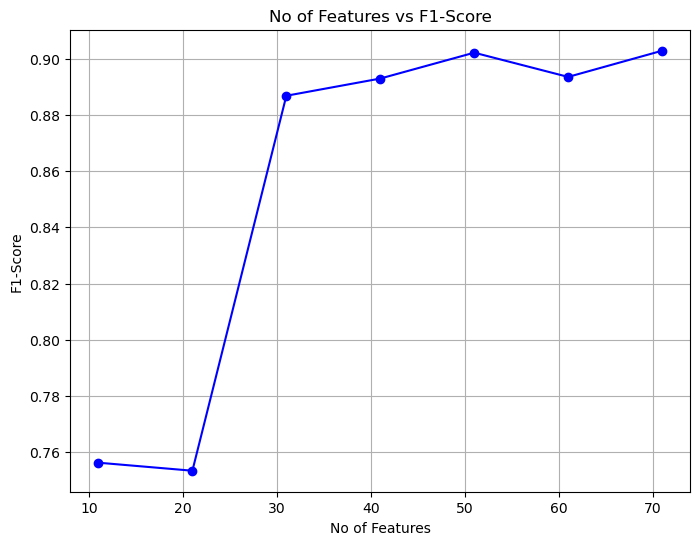

In [27]:
print_plot(SVM_f1)

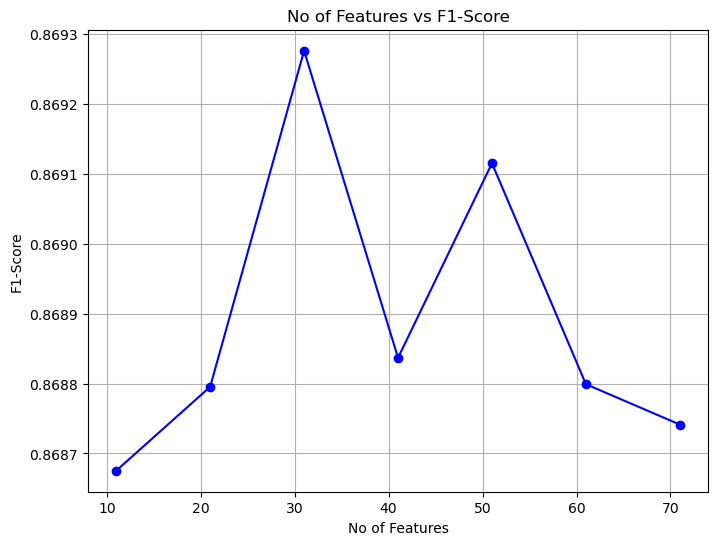

In [28]:
print_plot(KNN_f1)

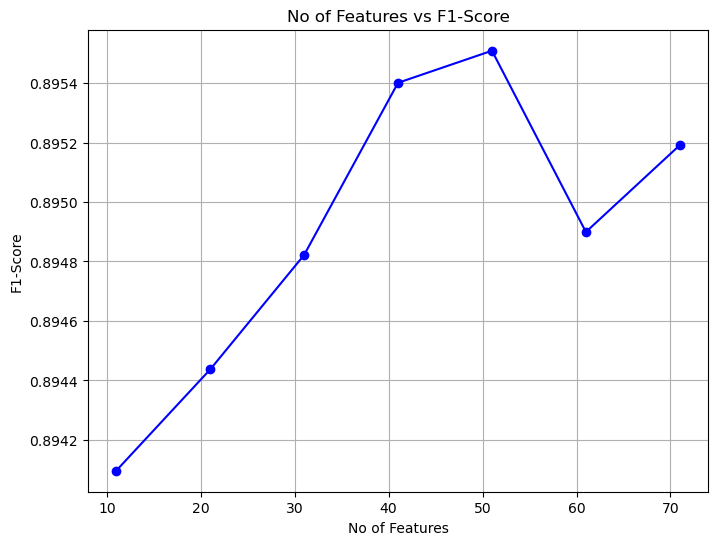

In [29]:
print_plot(RFC_f1)

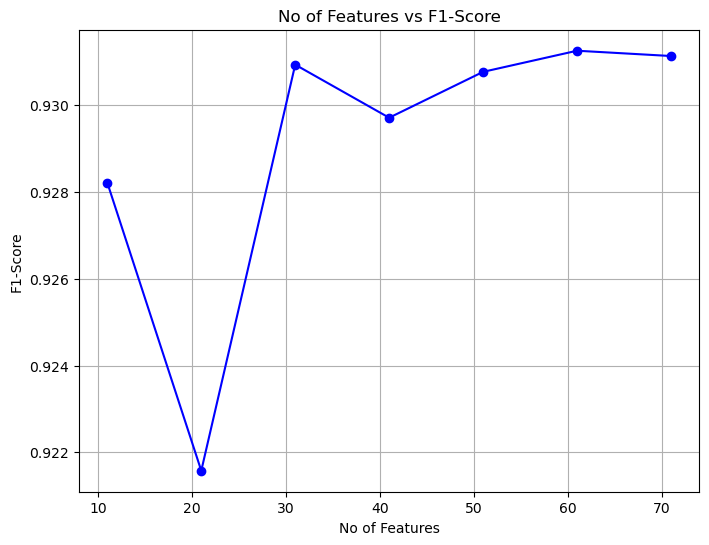

In [30]:
print_plot(LGBM_f1)

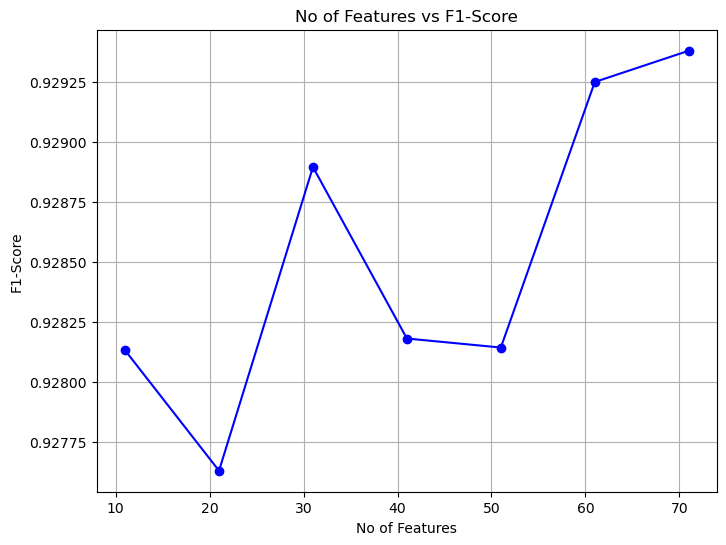

In [31]:
print_plot(XGB_f1)

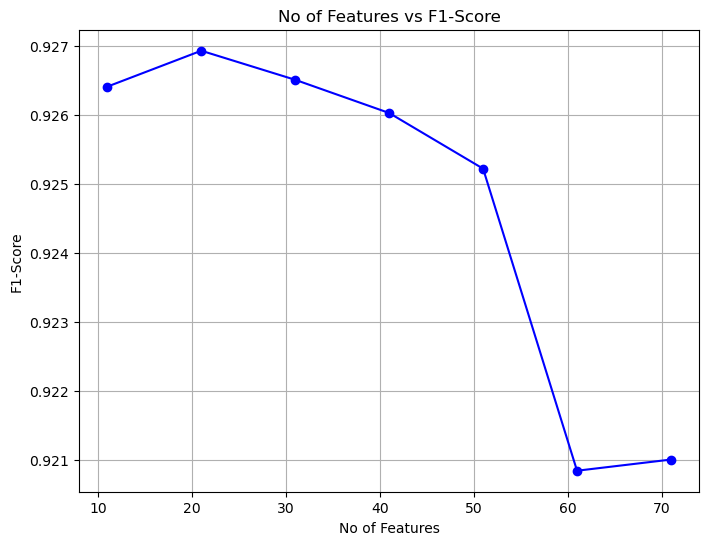

In [32]:
print_plot(CB_f1)